In [1]:
import numpy as np
import cv2

In [12]:
#load the xml files for face detection into the program
face_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/Colabs/ННГАСУ/haarcascade_frontalface_default.xml')
smile_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/Colabs/ННГАСУ/haarcascade_smile.xml')
eye_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/Colabs/ННГАСУ/haarcascade_eye.xml')

In [13]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Colabs/ННГАСУ/
#read the image for furthur editing
image_name = 'test_1.jpg'
image = cv2.imread(image_name)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colabs/ННГАСУ


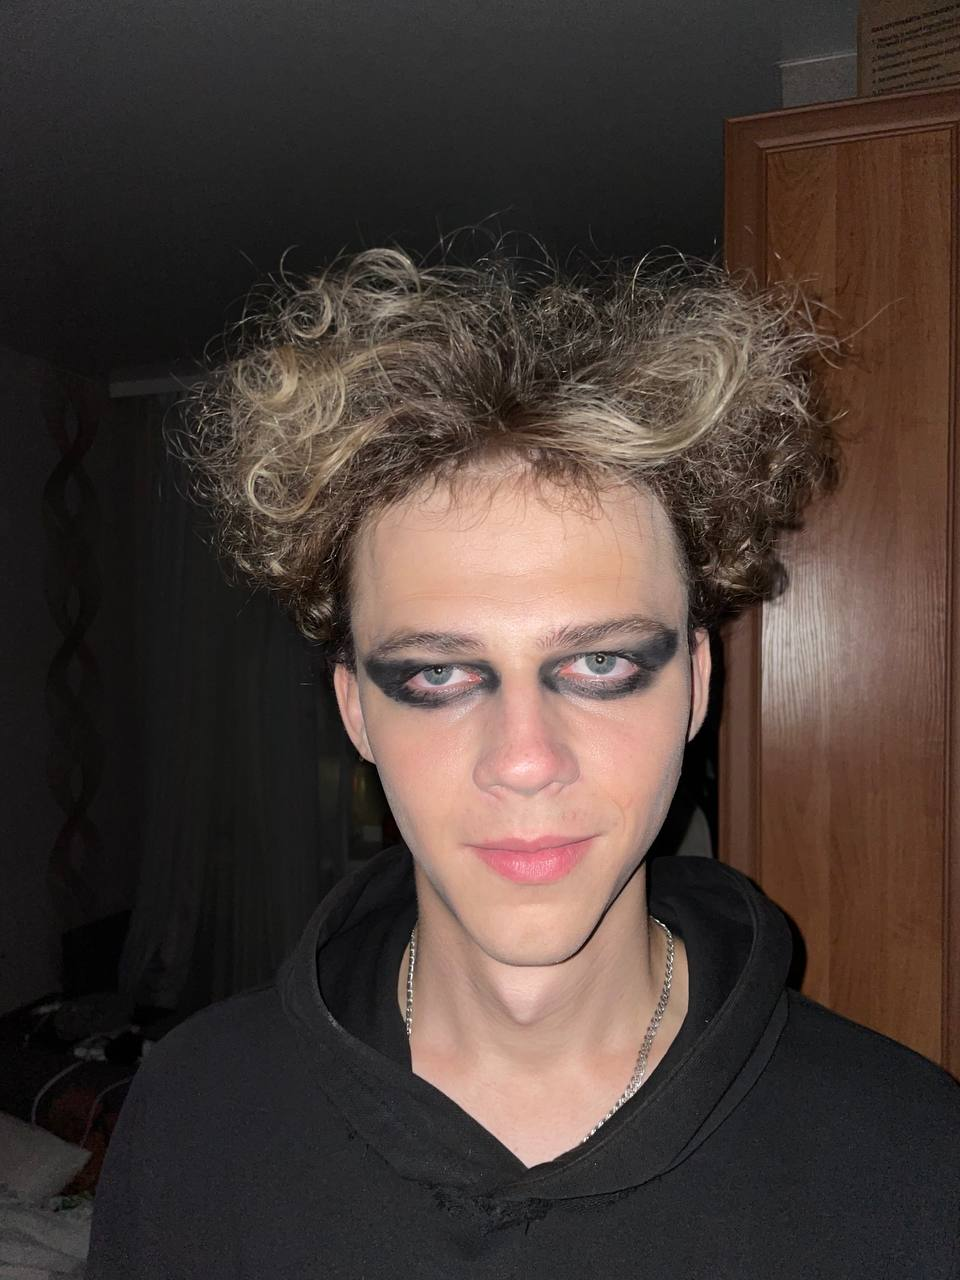

-1

In [14]:
from google.colab.patches import cv2_imshow
#show the original image
#https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Google_team_group_photo_with_Vanhanen.jpg/640px-Google_team_group_photo_with_Vanhanen.jpg
cv2_imshow(image)
cv2.waitKey(100)



In [15]:
if image_name == 'test_2.jpg':
  faces = face_cascade.detectMultiScale(image, 2, 3)
  smile = smile_cascade.detectMultiScale(image, 2, 6)
  eye = eye_cascade.detectMultiScale(image, 1.6, 5)
else:
  faces = face_cascade.detectMultiScale(image, 4.6, 1)
  smile = smile_cascade.detectMultiScale(image, 4.1, 24)
  eye = eye_cascade.detectMultiScale(image, 6.3, 1)


In [16]:
#convert the RBG image to gray scale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [17]:
for(x, y, w, h) in eye:
  cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2) #blue
  roi_gray = gray_image[y:y+h, x:x+w]
  roi_color = image[y:y+h, x:x+w]

In [18]:
for(x, y, w, h) in smile:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2) #зеленый
  roi_gray = gray_image[y:y+h, x:x+w]
  roi_color = image[y:y+h, x:x+w]

In [19]:

#iteration through the faces array and draw a rectangle
for(x, y, w, h) in faces:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2) #red
  roi_gray = gray_image[y:y+h, x:x+w]
  roi_color = image[y:y+h, x:x+w]

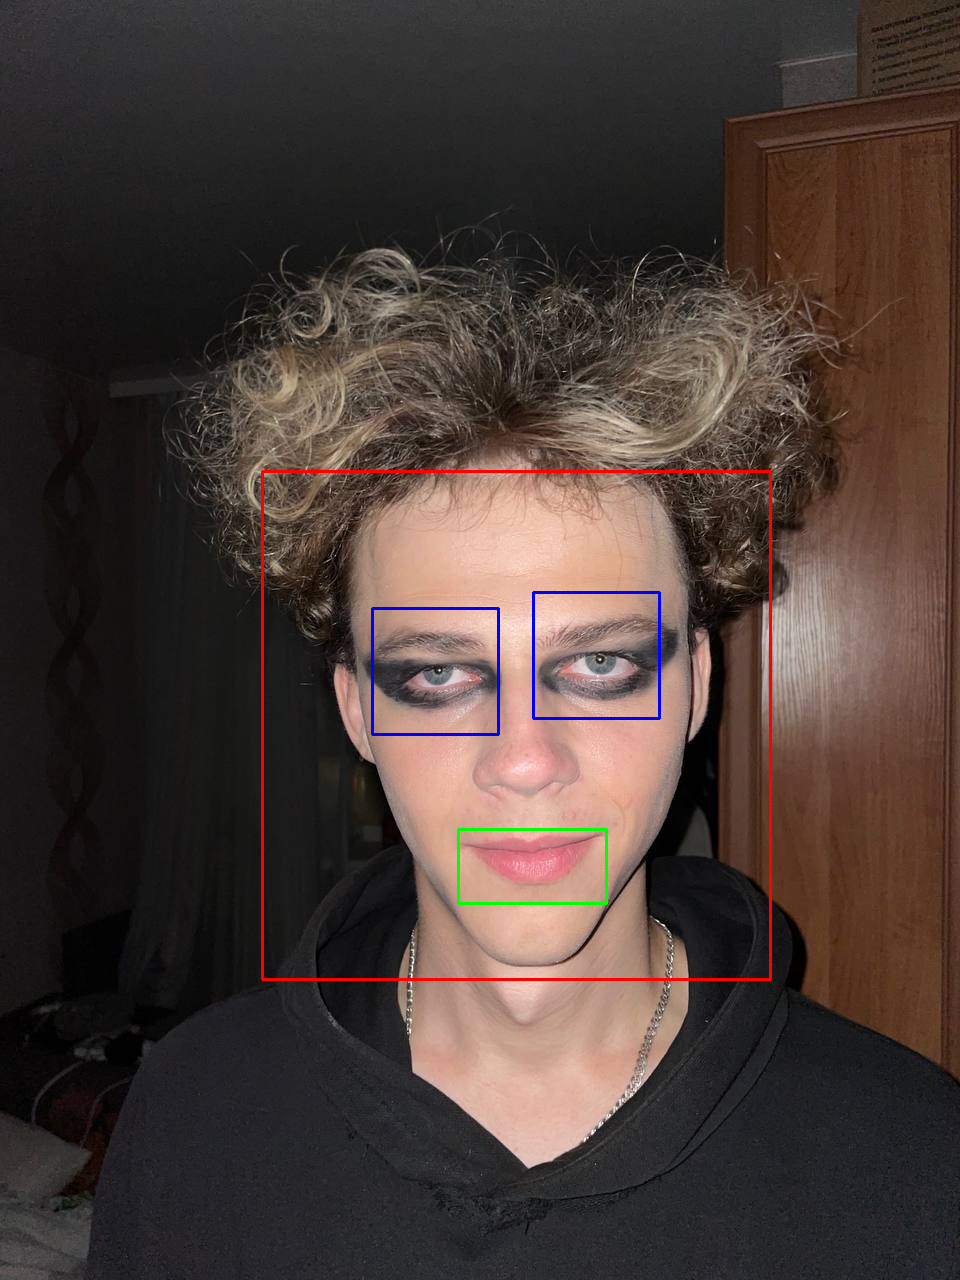

-1

In [20]:
#show the final image after detection
cv2_imshow(image)
cv2.waitKey()